# CS 109A/STAT 121A/AC 209A 

## Lab 2: Cleaning and EDA of Goodreads 

**Harvard University**<br>
**Fall 2017**<br>
**Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine**

---

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Goals

About 6000 odd "best books" were fetched and parsed from [Goodreads](https://www.goodreads.com). The "bestness" of these books came from a proprietary formula used by Goodreads and published as a list on their web site.

We parsed the page for each book and saved data from all these pages in a tabular format as a CSV file. In this lab we'll clean and further parse the data.  We'll then do some exploratory data analysis to answer questions about these best books and popular genres.  


By the end of this lab, you should be able to:

- Load and systematically address missing values, ancoded as `NaN` values in our data set, for example, by removing observations associated with these values.
- Parse columns in the dataframe to create new dataframe columns.
- Create and interpret visualizations to explore the data set

*This lab corresponds to lectures 2 and 3 and maps on to homework 1 and further.*

### Basic EDA workflow

(From the lecture, repeated here for convenience).

The basic workflow is as follows:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Report all the issues you found with the data and how you resolved them.  

[15 minutes]

----

## _Part 1 - SOLUTION_ 




After loading appropriate libraries


In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [27]:
#Read the data into a dataframe
df = pd.read_csv("data/goodreads.csv")

#Examine the first couple of rows of the dataframe
df.head()

,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.Suzanne_Collins,2008,/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
0,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
1,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
2,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
3,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
4,4.25,12363,0446675539,good_reads:book,https://www.goodreads.com/author/show/11081.Ma...,1936.0,/genres/classics|/genres/historical-fiction|/g...,dir01/18405.Gone_with_the_Wind.html,645470,Gone with the Wind


In [28]:
df=pd.read_csv("data/goodreads.csv", header=None,
               names=["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'],
)

#Examine the first couple of rows of the dataframe
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [29]:
#Start by check the column data types
####### 
df.dtypes
####### 


rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [30]:
#Come up with a few other important properties of the dataframe to check

print(df.shape)
df.columns

(6000, 10)


Index(['rating', 'review_count', 'isbn', 'booktype', 'author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name'], dtype='object')

Was the data read correctly and values represented as we expected?

Notice that `review_count` and `rating_counts` are objects instead of ints, and the `year` is a float!

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

Let's see for a column which seemed OK to us.

In [31]:
#Get a sense of how many missing values there are in the dataframe.
np.sum([df.rating.isnull()])

2

In [32]:
#Try to locate where the missing values occur
df[df.rating.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None


How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

We'll now check if any of the other suspicious columns have missing values.  Let's look at `year` and `review_count` first.

One thing you can do is to try and convert to the type you expect the column to be. If something goes wrong, it likely means your data are bad.

Lets test for missing data:

In [33]:
df[df.year.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None
5572,3.71,35,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"


### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [34]:
#Treat the missing or invalid values in your dataframe
####### 

df = df[df.year.notnull()]

Ok so we have done some cleaning. What do things look like now? Notice the float has not yet changed.

In [35]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [36]:
print(np.sum(df.year.isnull()))
print(np.sum(df.rating_count.isnull())) 
print(np.sum(df.review_count.isnull())) 
# We removed seven rows
df.shape

0
0
0


(5993, 10)

*Suspect observations for rating and rating_count were removed as well! *

Ok so lets fix those types. If the type conversion fails, we now know we have further problems

In [37]:
df.rating_count=df.rating_count.astype(int)
df.review_count=df.review_count.astype(int)
df.year=df.year.astype(int)

We seem to be good on these columns (no errors in conversion). Lets look:

In [38]:
df.dtypes

rating          float64
review_count      int32
isbn             object
booktype         object
author_url       object
year              int32
genre_urls       object
dir              object
rating_count      int32
name             object
dtype: object

Sweet!

Some of the other colums that should be strings have NaN.

In [39]:
df.loc[df.genre_urls.isnull(), 'genre_urls']=""
df.loc[df.isbn.isnull(), 'isbn']=""

##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.
[5 min]

## _Part 2 SOLUTION_ 
---

* Which are the best books?
* Is finction more popular than fantasy? 
* Is J K Rowling the highest rated author?
* What are the trends in popularity of genres
* Which genre is more popular now vs 100 years ago?

---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  

[10 minutes]

---

## _Part 3:  SOLUTION_ 


Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [40]:
#Get the first author_url
test_string = df.author_url[0]
test_string

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [41]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
####### 
test_string.split('/')[-1].split('.')[1:][0]

'Suzanne_Collins'

In [42]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
def get_author(url):
    
    name = url.split('/')[-1].split('.')[1:][0]
    ####### 
    return name

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.author[0:5]

0    Suzanne_Collins
1        J_K_Rowling
2    Stephenie_Meyer
3         Harper_Lee
4        Jane_Austen
Name: author, dtype: object

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.


In [43]:

df.genre_urls.head()

0    /genres/young-adult|/genres/science-fiction|/g...
1    /genres/fantasy|/genres/young-adult|/genres/fi...
2    /genres/young-adult|/genres/fantasy|/genres/ro...
3    /genres/classics|/genres/fiction|/genres/histo...
4    /genres/classics|/genres/fiction|/genres/roman...
Name: genre_urls, dtype: object

In [44]:
#Examine some examples of genre_urls

#Test out some string operations to isolate the genre name
test_genre_string=df.genre_urls[0]
genres=test_genre_string.strip().split('|')
for e in genres:
    print(e.split('/')[-1])
    "|".join(genres)

young-adult
science-fiction
dystopia
fantasy
science-fiction
romance
adventure
book-club
young-adult
teen
apocalyptic
post-apocalyptic
action


In [46]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
def split_and_join_genres(url):
    genres=url.strip().split('|')
    genres=[e.split('/')[-1] for e in genres]
    return "|".join(genres)


df['genres']=df.genre_urls.map(split_and_join_genres)
df.head()


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,young-adult|science-fiction|dystopia|fantasy|s...
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,young-adult|fantasy|romance|paranormal|vampire...
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee,classics|fiction|historical-fiction|academic|s...
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen,classics|fiction|romance|historical-fiction|li...


In [47]:
split_and_join_genres("/genres/young-adult|/genres/science-fiction")

'young-adult|science-fiction'

In [48]:
split_and_join_genres("")

''

Finally, let's pick an author at random so we can see the results of the transformations.  Scroll to see the `author` and `genre` columns that we added to the dataframe.

In [143]:
df[df.author == "Marguerite_Yourcenar"]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
1014,4.23,483,0374529264,good_reads:book,https://www.goodreads.com/author/show/7732.Mar...,1951,/genres/historical-fiction|/genres/fiction|/ge...,dir11/12172.Memoirs_of_Hadrian.html,6258,Memoirs of Hadrian,Marguerite_Yourcenar,historical-fiction|fiction|cultural|france|cla...
5620,4.11,74,2070367983,good_reads:book,https://www.goodreads.com/author/show/7732.Mar...,1968,/genres/fiction|/genres/historical-fiction|/ge...,dir57/953435.L_uvre_au_noir.html,1601,L'Åuvre au noir,Marguerite_Yourcenar,fiction|historical-fiction|cultural|france|eur...


---

## Part 4: EDA 
Before proceeding any further, get to know the dataset using a few "global property" visualizations, illustrating histograms with both linear and log scales. Do you find anything interesting or strange? 


[10 minutes]

---


##  _Part 4: Solution_


Choose some columns to generate histograms.

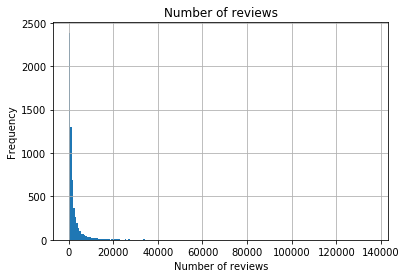

In [49]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)

df.review_count.hist(bins=200)
plt.xlabel('Number of reviews')
plt.ylabel('Frequency')
plt.title('Number of reviews');

plt.show();

If your histograms appear strange or counter-intuitive, make appropriate adjustments in the data and re-visualize.

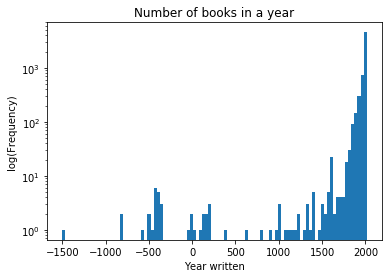

In [50]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)



plt.hist(df.year, log=True, bins=100);
plt.xlabel('Year written')
plt.ylabel('log(Frequency)')
plt.title('Number of books in a year')


plt.show();

It appears that some books were written in negative years!  Print out the observations that correspond to negative years.  What do you notice about these books?  

In [51]:
#your code here
df[df.year < 0].name
#These are books written before the Common Era (BCE, equivalent to BC).

47                               The Odyssey
246                    The Iliad/The Odyssey
455                             The Republic
596                               The Aeneid
629                              Oedipus Rex
674                           The Art of War
746                        The Bhagavad Gita
777                                 Antigone
1233                       The Oedipus Cycle
1397                          Aesop's Fables
1398                   The Epic of Gilgamesh
1428                                   Medea
1815                            The Oresteia
1882         The Trial and Death of Socrates
2078    The History of the Peloponnesian War
2527                           The Histories
3133                          Complete Works
3274                  The Nicomachean Ethics
3757                              Lysistrata
4402                           The Symposium
4475                                 Apology
5367                          Five Dialogues
Name: name


## Part 5:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book." (After all, these are all the best books according to Goodreads)

[5 minutes] 

---

## _Part 5: Solution_

For example, we can determine the "best book" by year!

In [52]:
#Using .groupby, we can divide the dataframe into subsets by the values of 'year'.
#We can then iterate over these subsets
for year, subset in df.groupby('year'):
    #Find the best book of the year

    bestbook = subset[subset.rating == subset.rating.max()]
    if bestbook.shape[0] > 1:
        print(year, bestbook.name.values, bestbook.rating.values)
    else:
        print(year, bestbook.name.values[0], bestbook.rating.values[0])

-1500 The Epic of Gilgamesh 3.6
-800 The Iliad/The Odyssey 4.01
-560 Aesop's Fables 4.03
-512 The Art of War 3.92
-500 The Bhagavad Gita 4.06
-458 The Oresteia 3.96
-442 Antigone 3.52
-440 The Histories 3.94
-431 Medea 3.8
-429 Oedipus Rex 3.64
-411 The History of the Peloponnesian War 3.84
-400 Complete Works 4.3
-390 Apology 4.11
-380 The Republic 3.85
-370 The Symposium 3.99
-360 Five Dialogues 4.07
-350 The Nicomachean Ethics 3.88
-29 The Aeneid 3.77
4 The Seven Spiritual Laws of Success 4.04
8 Metamorphoses 4.01
13 The Day Jesus Rode Into Croydon 3.85
100 The New Oxford Annotated Bible, New Revised Standard Version 4.3
121 The Twelve Caesars 4.02
130 Holy Bible 4.45
158 The Golden Ass 3.88
174 Meditations 4.16
200 The Garden of Eden 3.75
201 Fe Fi FOE Comes 4.37
213 NaÃ¯ve. Super 3.9
397 Confessions 3.82
632 The Quran 4.37
800 Beowulf 3.38
900 The Arabian Nights 4.04
968 La BÃªte humaine (Les Rougon-Macquart, #17) 4.02
1002 The Pillow Book 4.04
1008 The Tale of Genji 3.68
1010 Sha

## Part 6:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?

[15 minutes]

---

## _Part 6: Solution_

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

In [56]:
#Get the unique genres contained in the dataframe.
####### 
genres = set()
for genre_string in df.genres:
    genres.update(genre_string.split('|'))
genres = sorted(genres)
genres

['',
 '14th-century',
 '15th-century',
 '16th-century',
 '17th-century',
 '18th-century',
 '19th-century',
 '20th-century',
 'abuse',
 'academia',
 'academic',
 'action',
 'activism',
 'adolescence',
 'adoption',
 'adult',
 'adult-fiction',
 'adventure',
 'africa',
 'african-american',
 'african-american-literature',
 'african-literature',
 'aliens',
 'alternate-history',
 'american',
 'american-civil-war',
 'american-fiction',
 'american-history',
 'american-novels',
 'americana',
 'anarchism',
 'ancient',
 'angels',
 'animal-fiction',
 'animals',
 'anime',
 'anthologies',
 'anthropology',
 'anthropomorphic',
 'apocalyptic',
 'architecture',
 'art',
 'art-history',
 'arthurian',
 'asia',
 'asian-literature',
 'astronomy',
 'atheism',
 'australia',
 'autobiography',
 'bande-dessin%C3%A9e',
 'banned-books',
 'baseball',
 'basketball',
 'batman',
 'bdsm',
 'beauty-and-the-beast',
 'belgian',
 'belgium',
 'biography',
 'biography-memoir',
 'biology',
 'birds',
 'bizarro-fiction',
 'boardi

In [57]:
df.shape

(5993, 12)

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [58]:
#Add a column for each genre

df.shape
for genre in genres:
    df["genre:"+genre] = [genre in g.split('|') for g in df.genres]
         
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres,genre:,genre:14th-century,genre:15th-century,genre:16th-century,genre:17th-century,genre:18th-century,genre:19th-century,genre:20th-century,genre:abuse,genre:academia,genre:academic,genre:action,genre:activism,genre:adolescence,genre:adoption,genre:adult,genre:adult-fiction,genre:adventure,genre:africa,genre:african-american,genre:african-american-literature,genre:african-literature,genre:aliens,genre:alternate-history,genre:american,genre:american-civil-war,genre:american-fiction,genre:american-history,genre:american-novels,genre:americana,genre:anarchism,genre:ancient,genre:angels,genre:animal-fiction,genre:animals,genre:anime,genre:anthologies,genre:anthropology,...,genre:time-travel-romance,genre:tragedy,genre:trans,genre:transgender,genre:travel,genre:travelogue,genre:true-crime,genre:true-story,genre:turkish,genre:turkish-literature,genre:ukraine,genre:unicorns,genre:united-states,genre:urban-fantasy,genre:urban-planning,genre:urbanism,genre:us-presidents,genre:utopia,genre:vampires,genre:vegan,genre:video-games,genre:walking,genre:war,genre:weird-fiction,genre:werewolves,genre:western,genre:western-romance,genre:wicca,genre:wilderness,genre:wildlife,genre:witches,genre:wizards,genre:wolves,genre:womens,genre:womens-fiction,genre:womens-studies,genre:world-history,genre:world-war-ii,genre:writing,genre:x-men,genre:young-adult,genre:young-adult-contemporary,genre:young-adult-fantasy,genre:young-adult-historical-fiction,genre:young-adult-paranormal,genre:young-adult-romance,genre:young-adult-science-fiction,genre:young-readers,genre:zen,genre:zombies
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,young-adult|science-fiction|dystopia|fantasy|s...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,young-adult|fantasy|romance|paranormal|vampire...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,Fals

As we see, the dataframe explodes horizontally.

In [59]:
df.shape

(5993, 550)

This is an "encoding" change. Genres are a categorical variable. What we have done is created a  **One Hot Encoding** where we have transformed to a True-False (1-0) encoding, or what is known as an **Indicator** variable. These are used all the time in Machine learning. 

Now explore some ways to visualize the genres represented in the dataframe. 

For example, you might ask which is the most represented genre.

The highest represented genres are shown below.

In [60]:
genreslist = ['genre:'+g for g in genres]
dfg = df[genreslist].sum() # True's sum as 1's, and default sum is columnwise

In [61]:
dfg.sort_values(ascending=False)

genre:fiction                           4362
genre:fantasy                           2742
genre:romance                           2228
genre:young-adult                       2132
genre:literature                        1609
genre:classics                          1584
genre:novels                            1487
genre:contemporary                      1309
genre:adult                             1211
genre:paranormal                        1201
genre:adventure                         1177
genre:historical-fiction                1177
genre:mystery                           1031
genre:science-fiction                    981
genre:book-club                          919
genre:cultural                           871
genre:supernatural                       780
genre:european-literature                772
genre:magic                              755
genre:adult-fiction                      737
genre:science-fiction-fantasy            737
genre:childrens                          723
genre:urba

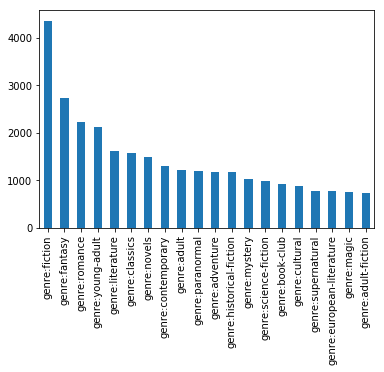

In [63]:
dfg.sort_values(ascending=False).iloc[0:20].plot(kind = "bar");

In [73]:
dfg.sort_values(ascending=False)[0:10]

genre:fiction         4362
genre:fantasy         2742
genre:romance         2228
genre:young-adult     2132
genre:literature      1609
genre:classics        1584
genre:novels          1487
genre:contemporary    1309
genre:adult           1211
genre:paranormal      1201
dtype: int64

Let's look at the most frequent genres by years. We create a visualization called a  *Small Multiples* plot, which shows the yearly histograms for multiple variables. 

(You can do this in seaborn using Factor plots or Panels, but sometimes its just easier to do it yourself, and you can do non-standard transformations as well.)

We limit the visualization to the genres that contain more than 550 books.

In [77]:
dfg1 = dfg.sort_values(ascending=False)

In [78]:
genres_wanted=dfg1.index[dfg1.values > 550]
print(genres_wanted.shape)
genres_wanted


(30,)


Index(['genre:fiction', 'genre:fantasy', 'genre:romance', 'genre:young-adult', 'genre:literature', 'genre:classics', 'genre:novels', 'genre:contemporary', 'genre:adult', 'genre:paranormal', 'genre:adventure', 'genre:historical-fiction', 'genre:mystery', 'genre:science-fiction', 'genre:book-club', 'genre:cultural', 'genre:supernatural', 'genre:european-literature', 'genre:magic', 'genre:adult-fiction', 'genre:science-fiction-fantasy', 'genre:childrens', 'genre:urban-fantasy', 'genre:teen',
       'genre:paranormal-romance', 'genre:thriller', 'genre:non-fiction', 'genre:humor', 'genre:womens-fiction', 'genre:chick-lit'],
      dtype='object')

For each genre, we collect the years for which this genre's column is true and make a set of histograms. We fix our bins and plot the histograms against a grey histogram for the general increase in books in our dataset per year.

Here we illustrate using axis matplotlib methods instead of `plt` functions as well:

(<matplotlib.figure.Figure at 0x262e8ace080>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262E8BD5128>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x00000262EAA67278>]], dtype=object))

C:\Users\Goodwin.Chen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


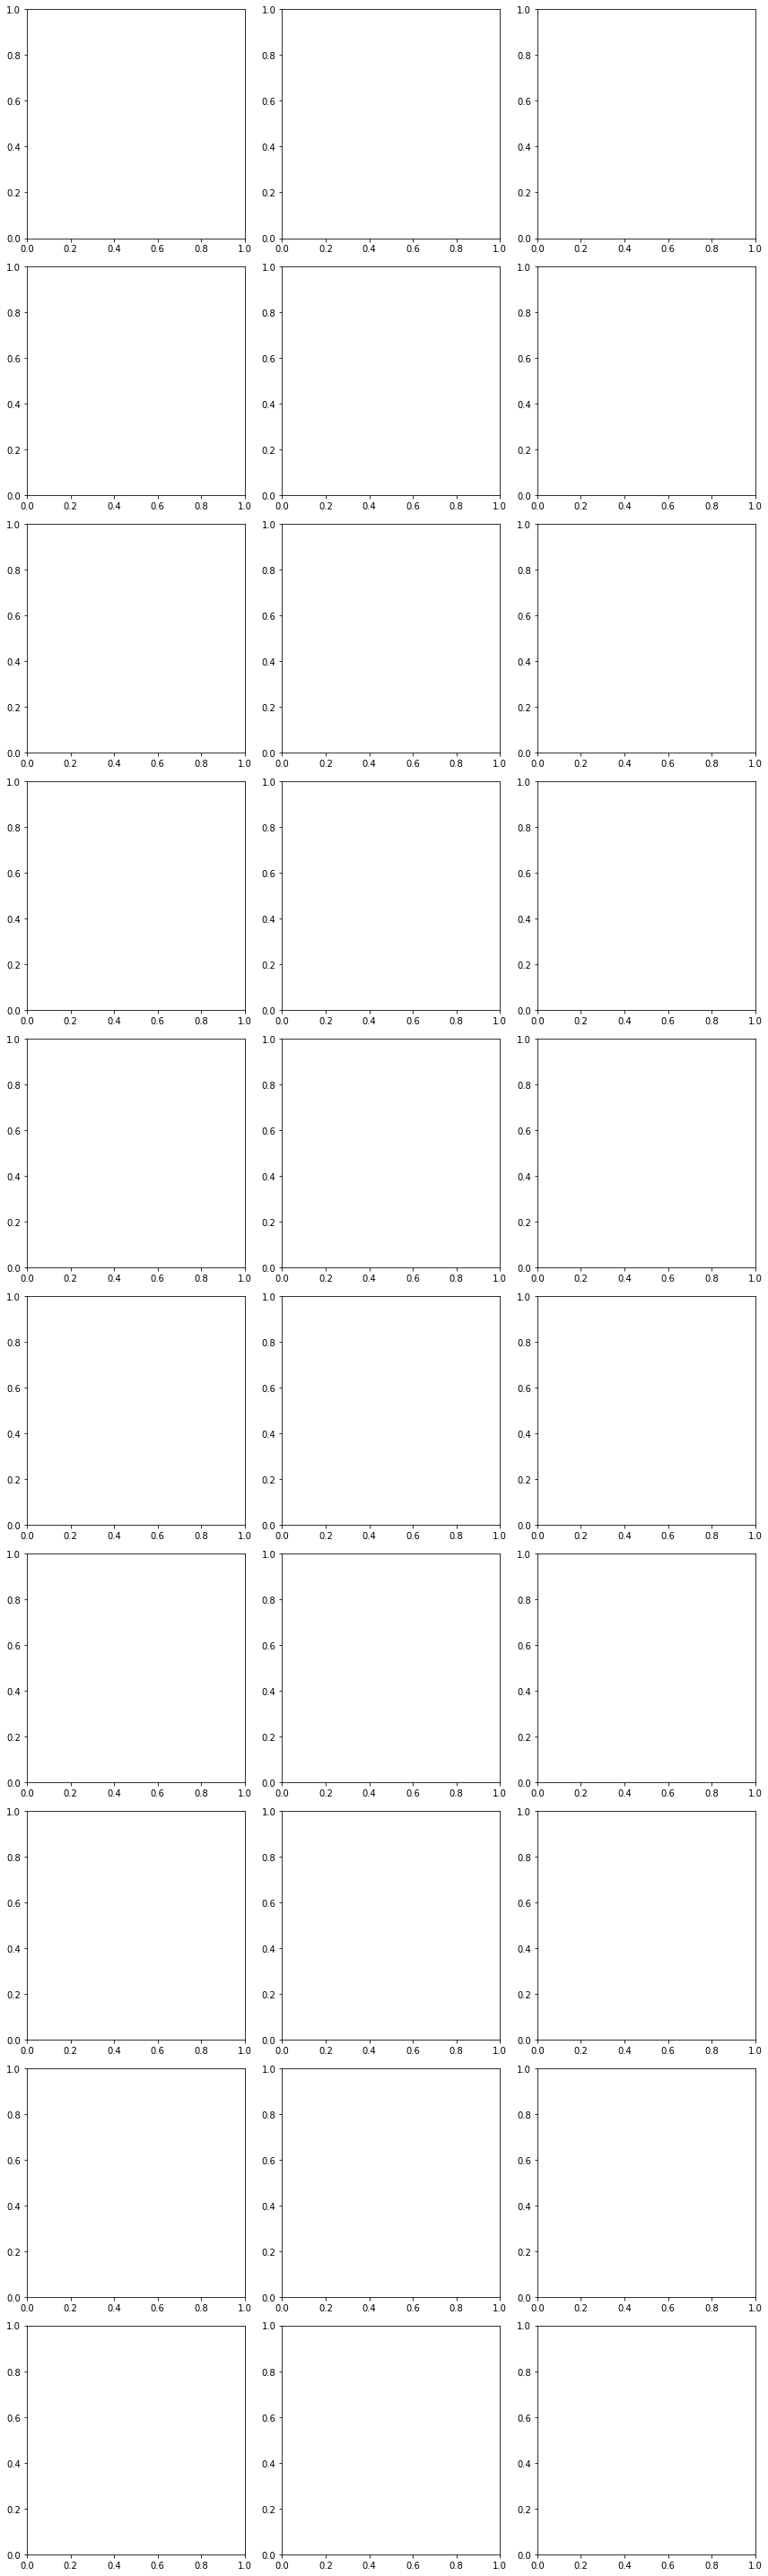

In [70]:
plt.subplots(nrows=10, ncols=3, figsize=(12, 40), 
                         tight_layout=True)

C:\Users\Goodwin.Chen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


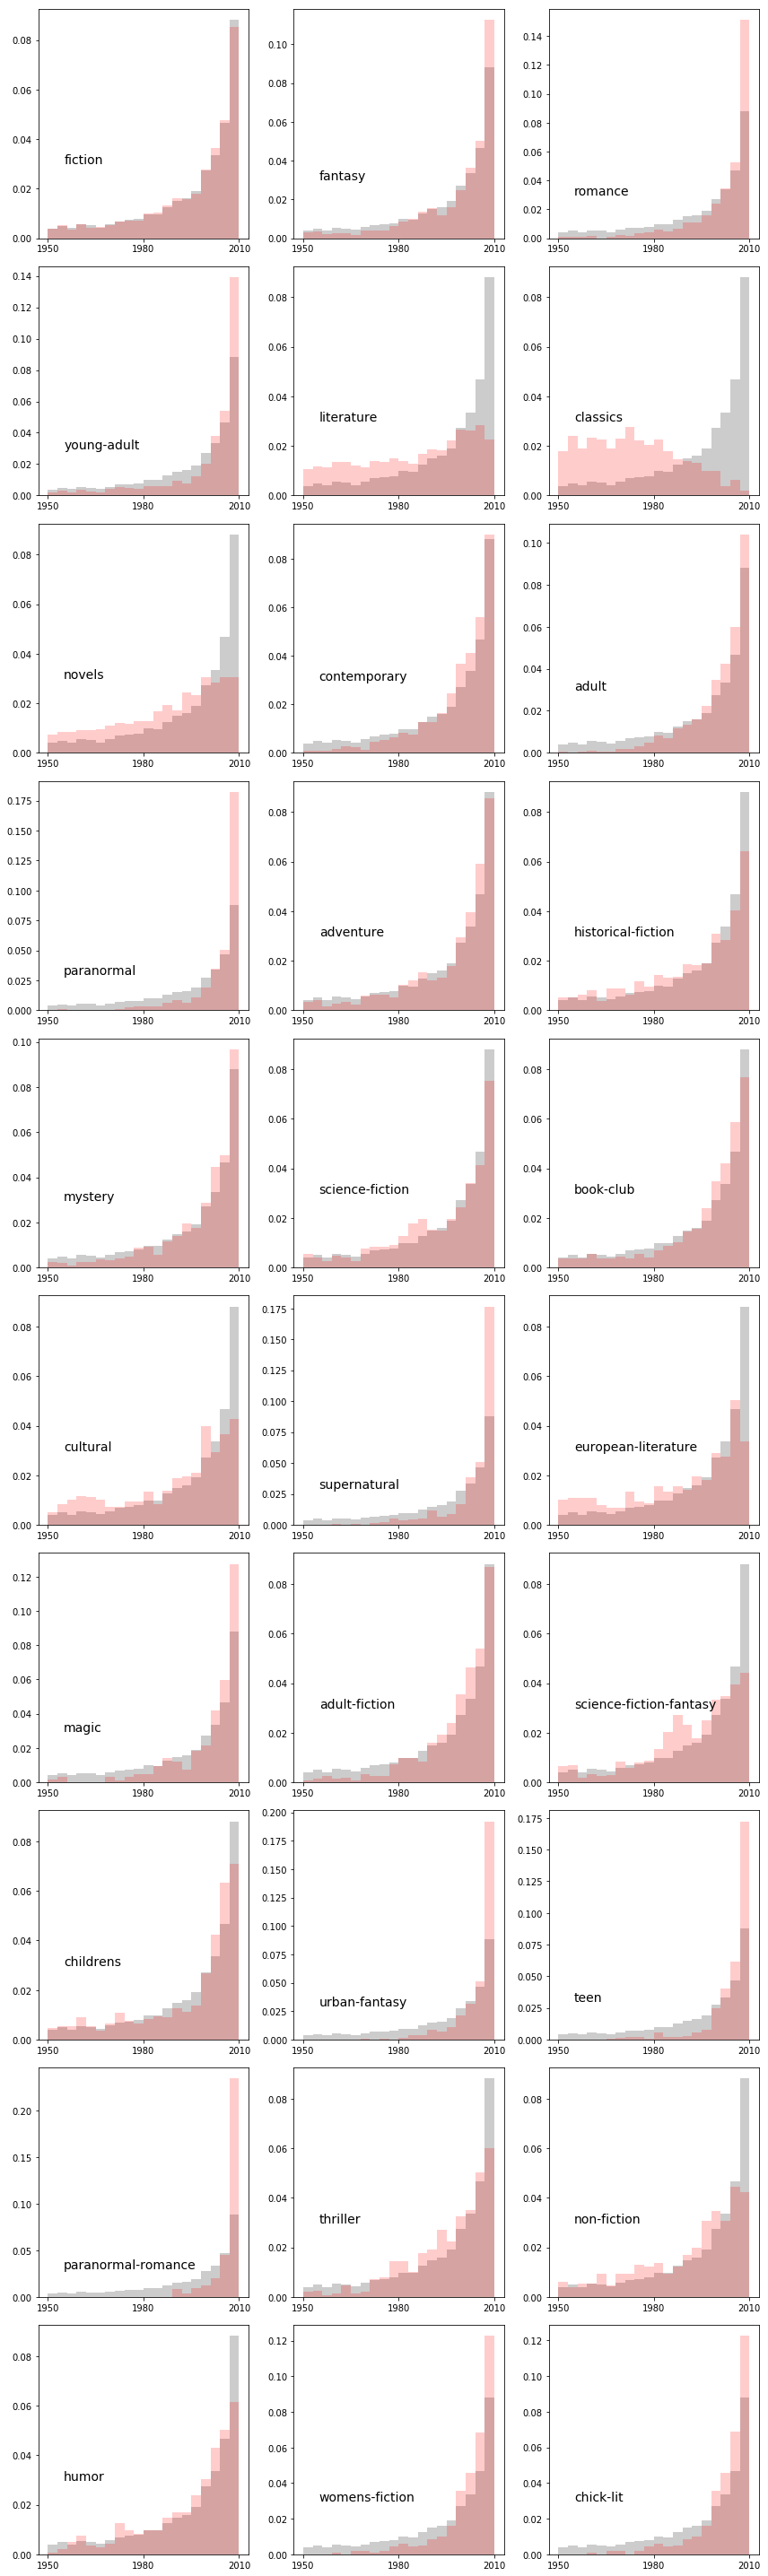

In [80]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(12, 40), 
                         tight_layout=True)
bins = np.arange(1950, 2013, 3)
for ax, genre in zip(axes.ravel(), genres_wanted):
    ax.hist(df[df[genre] == True].year.values, 
            bins=bins, histtype='stepfilled', normed=True, color='r', alpha=.2, ec='none')
    ax.hist(df.year, bins=bins, histtype='stepfilled', ec='None', normed=True, zorder=0, color='#cccccc')
    
    ax.annotate(genre.split(':')[-1], xy=(1955, 3e-2), fontsize=14)
    ax.xaxis.set_ticks(np.arange(1950, 2013, 30))

How might you clean up the axes?

### Part 6.1: What can you conclude from the above visualizations?

Pick two or three genres and describe how the popularity of these genres fluctuates with time.  

There is a category called Paranormal Romance!!!!!